In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM


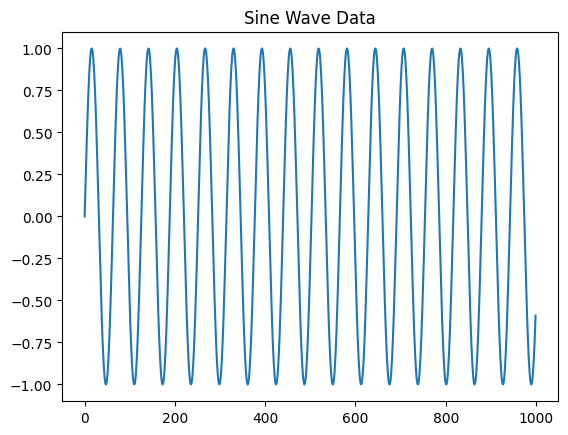

In [ ]:
# Generate a simple sine wave dataset as an example
data = np.sin(np.arange(0, 100, 0.1))
plt.plot(data)
plt.title("Sine Wave Data")
plt.show()


In [ ]:
# Reshape data to [samples, timesteps, features]
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences (X, y)
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(data, time_steps)

# Split into training and testing data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 43ms/step - loss: 0.2400 - val_loss: 0.0211
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0160 - val_loss: 0.0019
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 - val_loss: 7.6233e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.9808e-04 - val_loss: 6.0042e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.9716e-04 - val_loss: 5.3430e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5833e-04 - val_loss: 4.7734e-04
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.6142e-04 - val_loss: 4.5151e-04
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5397e-04 - val_loss: 3.8665e-04
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.7630e-04 - val_loss: 3.2786e-04
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4595e-04 - val_loss: 2.9898e-04
Epoch 12/20
2

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


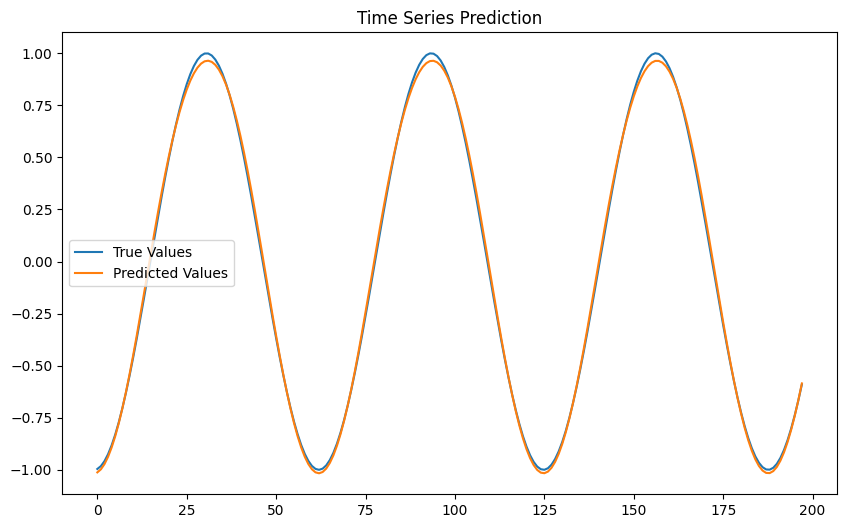

In [ ]:
# Predict using the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values')
plt.plot(y_pred_inv, label='Predicted Values')
plt.title('Time Series Prediction')
plt.legend()
plt.show()


In [ ]:
# prompt: find accuracy score of model

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"RMSE: {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"MAE: {mae}")

# You can also define a custom accuracy metric based on your specific needs.
# For example, if you want to measure the accuracy within a certain tolerance:
tolerance = 0.05  # Example tolerance
correct_predictions = np.sum(np.abs(y_test_inv - y_pred_inv) < tolerance)
accuracy = correct_predictions / len(y_test_inv)
print(f"Accuracy within {tolerance} tolerance: {accuracy}")

RMSE: 0.019322731298665536
MAE: 0.01657737866864225
Accuracy within 0.05 tolerance: 1.0
